In [3]:
import pandas as pd

In [4]:
df_old = pd.read_csv('../../data/processed/data_model_output_old.csv')
df_new = pd.read_csv('../../data/processed/data_model_output_new.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/processed/data_model_output_old.csv'

In [ ]:
df_old.head()

,unique_id,respondentid,is_completed,is_valid_record,date_completed,time_completed,is_pilot,is_self_administered,record_type_synthetic,access_mode,...,validation_error_person,validation_error_trip,validation_num_errors_person,validation_num_errors_trip,validation_severity_person,validation_severity_trip,weight_departing_only,weight_departing_only_with_time_of_day,weight_non_sas_departing_only,weight_departing_and_arriving
0,1,5473,True,True,2024-10-04,08:41:12,False,False,0,NaN,...,[],[],0,0,NaN,NaN,1.0,1.0,1.0,5.077165
1,2,5476,True,True,2024-10-04,08:40:04,False,False,0,1.0,...,[],[],0,0,NaN,NaN,1.0,1.0,1.0,4.749957
2,3,5489,True,True,2024-10-04,08:51:36,False,False,0,NaN,...,[],[],0,0,NaN,NaN,1.0,1.0,1.0,5.077165
3,4,5558,True,True,2024-10-04,10:32:58,False,False,0,1.0,...,[],[],0,0,NaN,NaN,1.0,1.0,1.0,4.749957
4,5,5593,True,True,2024-10-04,11:09:46,False,False,0,1.0,...,[],[],0,0,NaN,NaN,1.0,1.0,1.0,4.749957


In [ ]:
df_new.head()

,unique_id,respondentid,is_completed,is_valid_record,date_completed,time_completed,is_pilot,is_self_administered,record_type_synthetic,access_mode,...,validation_error_person,validation_error_trip,validation_num_errors_person,validation_num_errors_trip,validation_severity_person,validation_severity_trip,weight_departing_only,weight_departing_only_with_time_of_day,weight_non_sas_departing_only,weight_departing_and_arriving
0,1,5473,True,True,2024-10-04,08:41:12,False,False,0,NaN,...,[],[],0,0,NaN,NaN,1.0,1.0,1.0,10.850866
1,2,5476,True,True,2024-10-04,08:40:04,False,False,0,1.0,...,[],[],0,0,NaN,NaN,1.0,1.0,1.0,6.436419
2,3,5489,True,True,2024-10-04,08:51:36,False,False,0,NaN,...,[],[],0,0,NaN,NaN,1.0,1.0,1.0,10.850866
3,4,5558,True,True,2024-10-04,10:32:58,False,False,0,1.0,...,[],[],0,0,NaN,NaN,1.0,1.0,1.0,6.436419
4,5,5593,True,True,2024-10-04,11:09:46,False,False,0,1.0,...,[],[],0,0,NaN,NaN,1.0,1.0,1.0,6.436419


## comparisons:

In [ ]:
df_new[df_new['marketsegment_label']=='EMPLOYEE']['weight_departing_and_arriving'].sum()

np.float64(5998.569623616203)

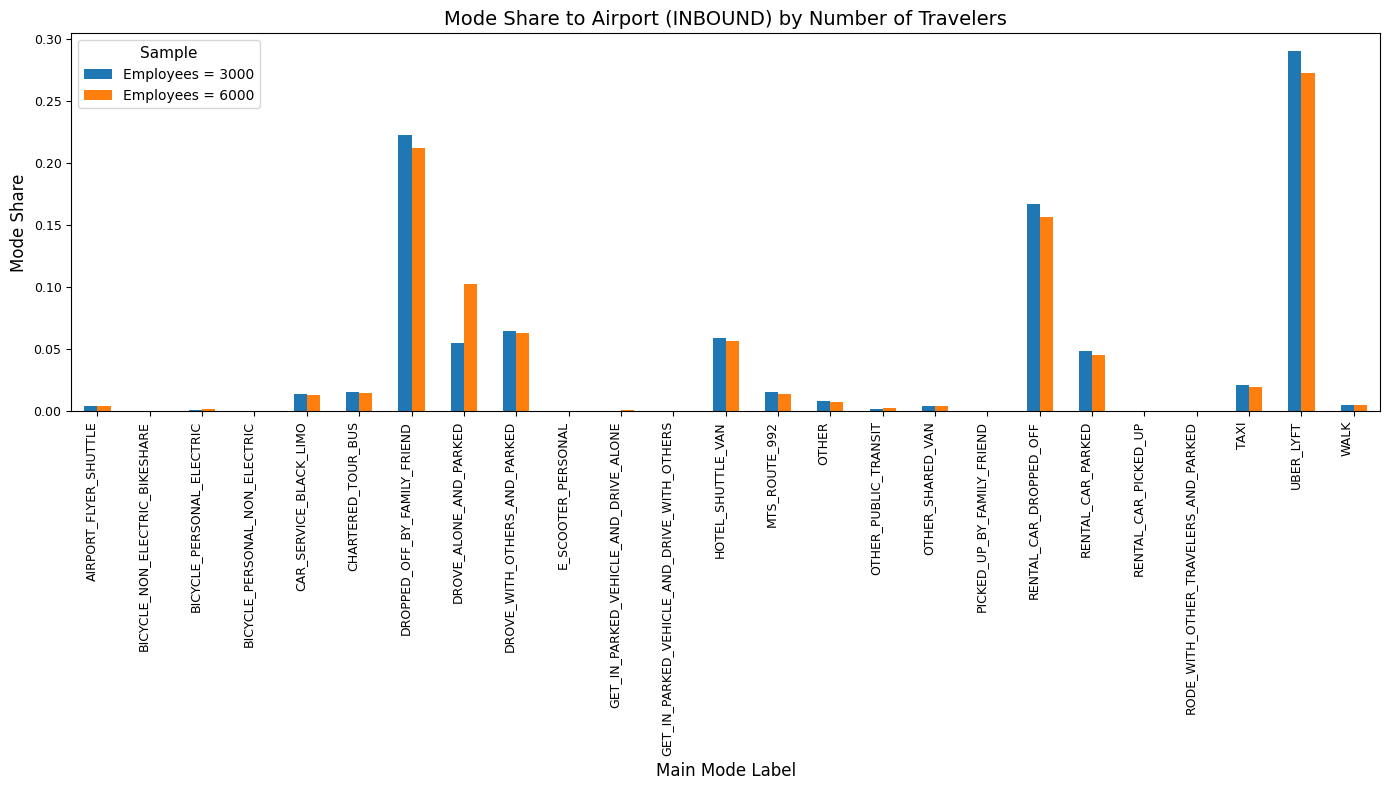

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for INBOUND_TO_AIRPORT
df_old_in = df_old[df_old['inbound_or_outbound_label'] == 'INBOUND_TO_AIRPORT'].copy()
df_new_in = df_new[df_new['inbound_or_outbound_label'] == 'INBOUND_TO_AIRPORT'].copy()

# Compute weighted traveler counts
df_old_in['traveler_weight'] = df_old_in['weight_departing_and_arriving'] * df_old_in['party_size_flight']
df_new_in['traveler_weight'] = df_new_in['weight_departing_and_arriving'] * df_new_in['party_size_flight']

# Group by mode and normalize to get mode share
old_share = df_old_in.groupby('main_mode_label')['traveler_weight'].sum()
old_share /= old_share.sum()

new_share = df_new_in.groupby('main_mode_label')['traveler_weight'].sum()
new_share /= new_share.sum()

# Combine into one DataFrame
mode_share_df = pd.concat([old_share.rename('Employees = 3000'),
                           new_share.rename('Employees = 6000')], axis=1).fillna(0)

# Plot with adjusted size and font
plt.figure(figsize=(14, 8))
ax = mode_share_df.plot(kind='bar', fontsize=9, ax=plt.gca())
plt.title('Mode Share to Airport (INBOUND) by Number of Travelers', fontsize=14)
plt.ylabel('Mode Share', fontsize=12)
plt.xlabel('Main Mode Label', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sample', fontsize=10, title_fontsize=11)
plt.tight_layout()
plt.show()


In [ ]:
mode_share_df

,Employees = 3000,Employees = 6000
main_mode_label,,
AIRPORT_FLYER_SHUTTLE,0.004531,0.004224
BICYCLE_NON_ELECTRIC_BIKESHARE,0.000124,0.000247
BICYCLE_PERSONAL_ELECTRIC,0.000869,0.001731
BICYCLE_PERSONAL_NON_ELECTRIC,0.000248,0.000495
CAR_SERVICE_BLACK_LIMO,0.013624,0.013009
CHARTERED_TOUR_BUS,0.015505,0.014544
DROPPED_OFF_BY_FAMILY_FRIEND,0.222573,0.212106
DROVE_ALONE_AND_PARKED,0.055049,0.102743
DROVE_WITH_OTHERS_AND_PARKED,0.065066,0.063388


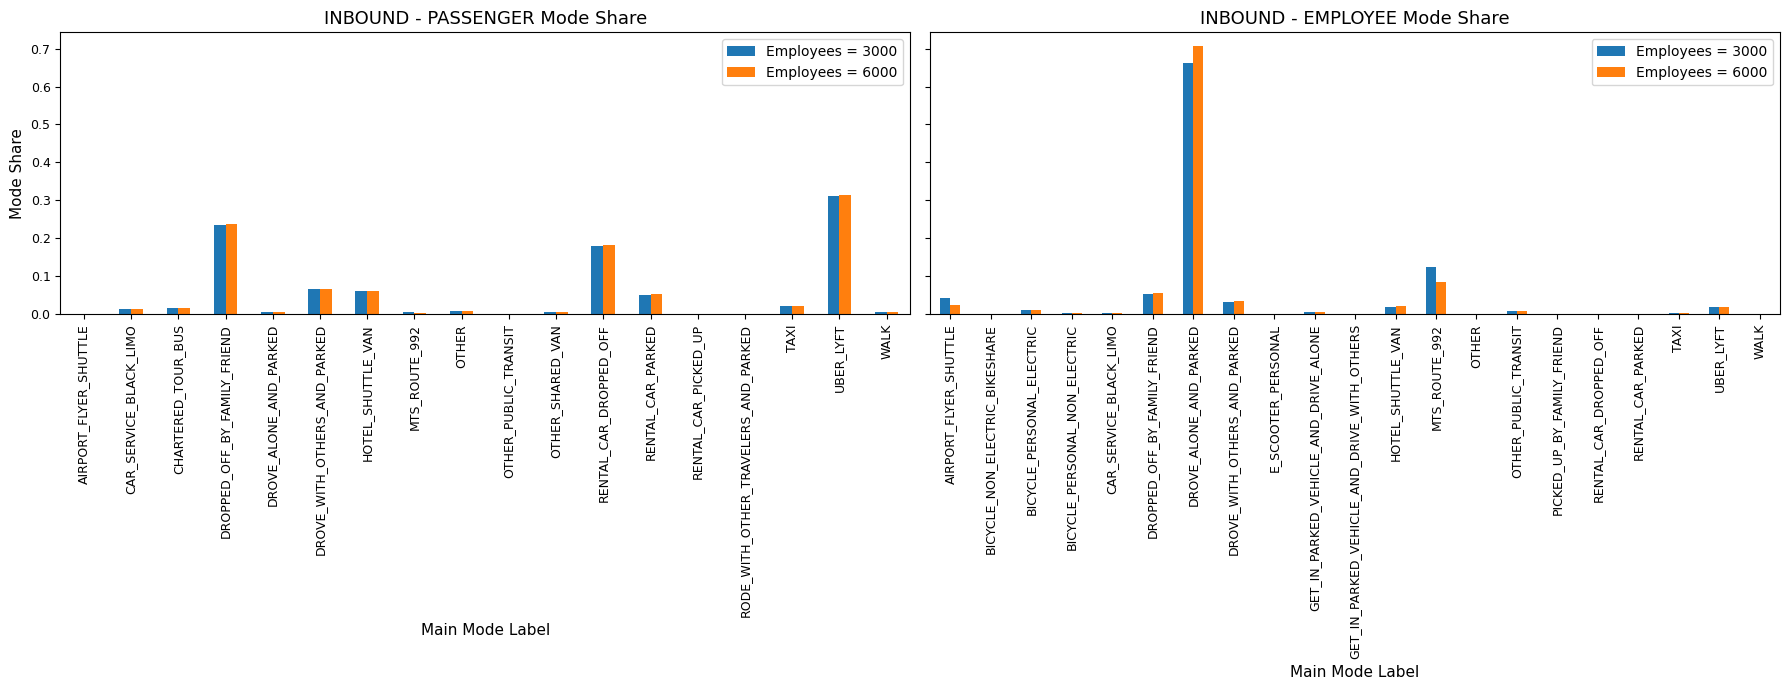

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper function to compute mode shares
def compute_mode_share(df_old, df_new, segment_value):
    df_old_seg = df_old[
        (df_old['inbound_or_outbound_label'] == 'INBOUND_TO_AIRPORT') &
        (df_old['marketsegment_label'] == segment_value)
    ].copy()

    df_new_seg = df_new[
        (df_new['inbound_or_outbound_label'] == 'INBOUND_TO_AIRPORT') &
        (df_new['marketsegment_label'] == segment_value)
    ].copy()

    df_old_seg['traveler_weight'] = df_old_seg['weight_departing_and_arriving'] * df_old_seg['party_size_flight']
    df_new_seg['traveler_weight'] = df_new_seg['weight_departing_and_arriving'] * df_new_seg['party_size_flight']

    old_share = df_old_seg.groupby('main_mode_label')['traveler_weight'].sum()
    old_share /= old_share.sum()

    new_share = df_new_seg.groupby('main_mode_label')['traveler_weight'].sum()
    new_share /= new_share.sum()

    return pd.concat([
        old_share.rename('Employees = 3000'),
        new_share.rename('Employees = 6000')
    ], axis=1).fillna(0)

# Compute mode shares
passenger_df = compute_mode_share(df_old, df_new, 'PASSENGER')
employee_df = compute_mode_share(df_old, df_new, 'EMPLOYEE')

# Plot
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharey=True)

passenger_df.plot(kind='bar', ax=axes[0], fontsize=9)
axes[0].set_title('INBOUND - PASSENGER Mode Share', fontsize=13)
axes[0].set_ylabel('Mode Share', fontsize=11)
axes[0].set_xlabel('Main Mode Label', fontsize=11)
axes[0].tick_params(axis='x', rotation=90)

employee_df.plot(kind='bar', ax=axes[1], fontsize=9)
axes[1].set_title('INBOUND - EMPLOYEE Mode Share', fontsize=13)
axes[1].set_xlabel('Main Mode Label', fontsize=11)
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


In [ ]:
df_old['traveler_weight'] = df_old['weight_departing_and_arriving'] * df_old['party_size_flight']
df_new['traveler_weight'] = df_new['weight_departing_and_arriving'] * df_new['party_size_flight']
df_old[(df_old['main_mode_label'] == 'AIRPORT_FLYER_SHUTTLE') & (df_old['inbound_or_outbound_label'] == 'INBOUND_TO_AIRPORT')]['traveler_weight'].sum(), df_new[(df_new['main_mode_label'] == 'AIRPORT_FLYER_SHUTTLE') & (df_new['inbound_or_outbound_label'] == 'INBOUND_TO_AIRPORT')]['traveler_weight'].sum()

(np.float64(185.2338810399021), np.float64(185.34093875370635))

In [ ]:
df_new[(df_new['marketsegment_label'] == 'EMPLOYEE') & (df_new['inbound_or_outbound_label'] == 'INBOUND_TO_AIRPORT')]['traveler_weight'].sum()

np.float64(5998.569623616203)

In [ ]:
df_new[(df_new['main_mode'] == 15) & (df_new['inbound_or_outbound_label'] == 'INBOUND_TO_AIRPORT')]['traveler_weight'].sum()

np.float64(628.3280727776228)

In [ ]:
#185, 628


In [ ]:
passenger_df

,Employees = 3000,Employees = 6000
main_mode_label,,
AIRPORT_FLYER_SHUTTLE,0.001556,0.000894
CAR_SERVICE_BLACK_LIMO,0.014435,0.014496
CHARTERED_TOUR_BUS,0.016733,0.016847
DROPPED_OFF_BY_FAMILY_FRIEND,0.236041,0.236813
DROVE_ALONE_AND_PARKED,0.007005,0.007017
DROVE_WITH_OTHERS_AND_PARKED,0.067671,0.067983
HOTEL_SHUTTLE_VAN,0.062022,0.062375
MTS_ROUTE_992,0.006673,0.003164
OTHER,0.008814,0.008866


In [ ]:
employee_df

,Employees = 3000,Employees = 6000
main_mode_label,,
AIRPORT_FLYER_SHUTTLE,0.042107,0.025250
BICYCLE_NON_ELECTRIC_BIKESHARE,0.001693,0.001809
BICYCLE_PERSONAL_ELECTRIC,0.011849,0.012662
BICYCLE_PERSONAL_NON_ELECTRIC,0.003385,0.003618
CAR_SERVICE_BLACK_LIMO,0.003385,0.003618
DROPPED_OFF_BY_FAMILY_FRIEND,0.052473,0.056076
DROVE_ALONE_AND_PARKED,0.661831,0.707283
DROVE_WITH_OTHERS_AND_PARKED,0.032161,0.034369
E_SCOOTER_PERSONAL,0.001693,0.001809
